<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zipp = zipfile.ZipFile("pizza_steak.zip")
zipp.extractall()
zipp.close

--2024-07-15 16:54:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 173.194.212.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   215MB/s    in 0.5s    

2024-07-15 16:54:14 (215 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

In [ ]:
import os
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def random_Image(direc, classs):
  folder = direc + classs
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  return img

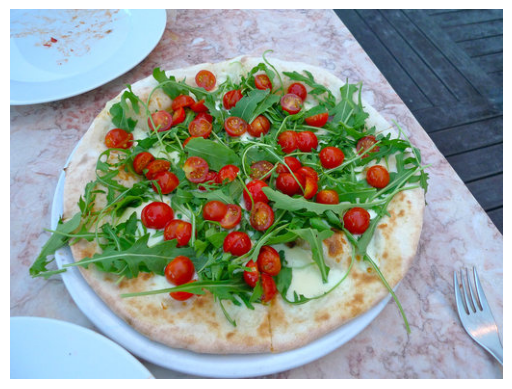

In [14]:
img = random_Image("pizza_steak/train/", "pizza")

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[236, 204, 157],
        [236, 204, 155],
        [236, 205, 151],
        ...,
        [241, 211, 159],
        [250, 207, 156],
        [254, 203, 150]],

       [[239, 206, 161],
        [237, 205, 156],
        [236, 204, 153],
        ...,
        [241, 211, 159],
        [248, 205, 154],
        [252, 202, 149]],

       [[241, 208, 165],
        [239, 207, 160],
        [237, 205, 156],
        ...,
        [239, 209, 157],
        [246, 205, 153],
        [248, 201, 149]],

       ...,

       [[243, 208, 170],
        [244, 210, 172],
        [239, 207, 166],
        ...,
        [241, 215, 158],
        [246, 213, 160],
        [245, 207, 158]],

       [[238, 198, 147],
        [245, 209, 159],
        [247, 217, 167],
        ...,
        [230, 208, 159],
        [239, 201, 164],
        [248, 202, 169]],

       [[243, 202, 146],
        [241, 204, 149],
        [239, 210, 154],
        ...,
        [234, 216, 17

In [ ]:
img.shape

(512, 512, 3)

#**Steps to build CNN Model**
* Load Images
* Preprocess images
* Build CNN model to find patterns
* Compile and Fit CNN model



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data to get all pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
#Compilation
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Fitting
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                    validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/10
47/47 [==============================] - 94s 2s/step - loss: 0.5417 - accuracy: 0.7213 - val_loss: 0.3920 - val_accuracy: 0.8520
Epoch 2/10
47/47 [==============================] - 93s 2s/step - loss: 0.4510 - accuracy: 0.7980 - val_loss: 0.3752 - val_accuracy: 0.8540
Epoch 3/10
47/47 [==============================] - 96s 2s/step - loss: 0.3879 - accuracy: 0.8307 - val_loss: 0.3461 - val_accuracy: 0.8540
Epoch 4/10
47/47 [==============================] - 93s 2s/step - loss: 0.3518 - accuracy: 0.8460 - val_loss: 0.3160 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 93s 2s/step - loss: 0.3043 - accuracy: 0.8780 - val_loss: 0.3410 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 93s 2s/step - loss: 0.2605 - accuracy: 0.9027 - val_loss: 0.2809 - val_accuracy: 0.8880
Epoch 7/10
47/47 [==============================] - 93s 2s/step - loss: 0.1935 - accuracy: 0.9313 - val_loss: 0.3227 - val_accuracy: 0.8580
Epoch 8/10
47/47 [==